# Zaneta Fransiske - 2702312146
## Case 1A 

<span style="color: red; font-size: 19px;"> A. Exploratory Data Analysis (EDA)</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models, Input, regularizers
from tensorflow.keras.losses import Huber
from tensorflow.keras.models import Sequential, Model
import keras_tuner as kt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add, concatenate
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
file_path = "C:/COOLYEAH/SEM 4/Deep Learning/UTS/dataset_1A.parquet"
data = pd.read_parquet(file_path)

In [3]:
data.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,8,3,Sunday,Yes,24.492063,59.969085,1403.454805,7,On,Off,29.965327,82.05735763545306
1,1,8,Wednesday,No,26.312114,51.408711,1220.547133,8,On,Off,5.986875,83.88917674427188
2,1,19,Sunday,Yes,20.516186,40.918500,1114.230124,8,Off,On,20.489098,66.20209750906106
3,7,3,Wednesday,Yes,20.879426,46.859237,1096.207227,7,Off,On,21.321157,66.43917871187017
4,10,17,Saturday,No,23.015216,48.998158,1999.982252,1,Off,Off,3.966075,76.90227179904673


In [4]:
data.tail()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
1227,9,2,Saturday,No,29.412360,47.368427,1905.249762,3,On,Off,9.602456,79.74911905310127
1228,6,16,Saturday,Yes,24.019593,59.272447,1274.096723,9,Off,On,21.973733,72.93770990438871
1229,1,1,Tuesday,No,21.926454,44.605974,1135.054165,5,On,On,4.858261,77.02412225998496
1230,3,2,Monday,No,24.581719,32.637069,1295.556323,5,Off,Off,1.763935,71.75136050151936
1231,12,17,Sunday,Yes,22.229281,46.942542,1330.187266,6,On,On,20.657222,72.10855378660037


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1232 non-null   object 
 1   Hour               1232 non-null   int64  
 2   DayOfWeek          1232 non-null   object 
 3   Holiday            1232 non-null   object 
 4   Temperature        1232 non-null   float64
 5   Humidity           1232 non-null   float64
 6   SquareFootage      1232 non-null   float64
 7   Occupancy          1232 non-null   int64  
 8   HVACUsage          1232 non-null   object 
 9   LightingUsage      1232 non-null   object 
 10  RenewableEnergy    1232 non-null   float64
 11  EnergyConsumption  1232 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 115.6+ KB
None


In [6]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 1232
Number of columns: 12


In [7]:
data.describe()

,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,11.192370,24.887052,45.749180,1511.599284,4.607143,15.339704
std,6.941171,3.045583,9.083050,297.219745,2.905757,9.225973
min,0.000000,20.007565,30.015975,1000.512661,-5.000000,0.006642
25%,5.000000,22.385226,38.022993,1258.359797,2.000000,7.638064
50%,11.000000,24.716913,46.152351,1504.978812,5.000000,15.601873
75%,17.000000,27.305707,53.317264,1773.253483,7.000000,23.118105
max,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327


#### Check Missing Value

In [8]:
print("\nMissing Values per Kolom:")
print(data.isnull().sum())


Missing Values per Kolom:
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


#### Check Data Duplikat

In [9]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Month, Hour, DayOfWeek, Holiday, Temperature, Humidity, SquareFootage, Occupancy, HVACUsage, LightingUsage, RenewableEnergy, EnergyConsumption]
Index: []


#### Check Value Unik

In [10]:
for col in data.columns:
    if data[col].dtype == 'object': 
        print(f"\nKolom: {col}")
        print("Unique values:")
        print(data[col].value_counts(dropna=False))  
        print(f"Total unique: {data[col].nunique()}") 


Kolom: Month
Unique values:
Month
1            189
4            119
10           115
3            100
12            99
6             95
11            93
8             90
7             88
5             84
9             83
2             64
Sep            7
July           4
September      2
Name: count, dtype: int64
Total unique: 15

Kolom: DayOfWeek
Unique values:
DayOfWeek
Sunday       192
Saturday     184
Thursday     182
Monday       169
Friday       169
Wednesday    168
Tuesday      168
Name: count, dtype: int64
Total unique: 7

Kolom: Holiday
Unique values:
Holiday
No     675
Yes    557
Name: count, dtype: int64
Total unique: 2

Kolom: HVACUsage
Unique values:
HVACUsage
Off    630
On     602
Name: count, dtype: int64
Total unique: 2

Kolom: LightingUsage
Unique values:
LightingUsage
On     619
Off    613
Name: count, dtype: int64
Total unique: 2

Kolom: EnergyConsumption
Unique values:
EnergyConsumption
53.263278            11
99.20112              8
nan                   3
82.0573

#### Analisis Variabel Kategorik 

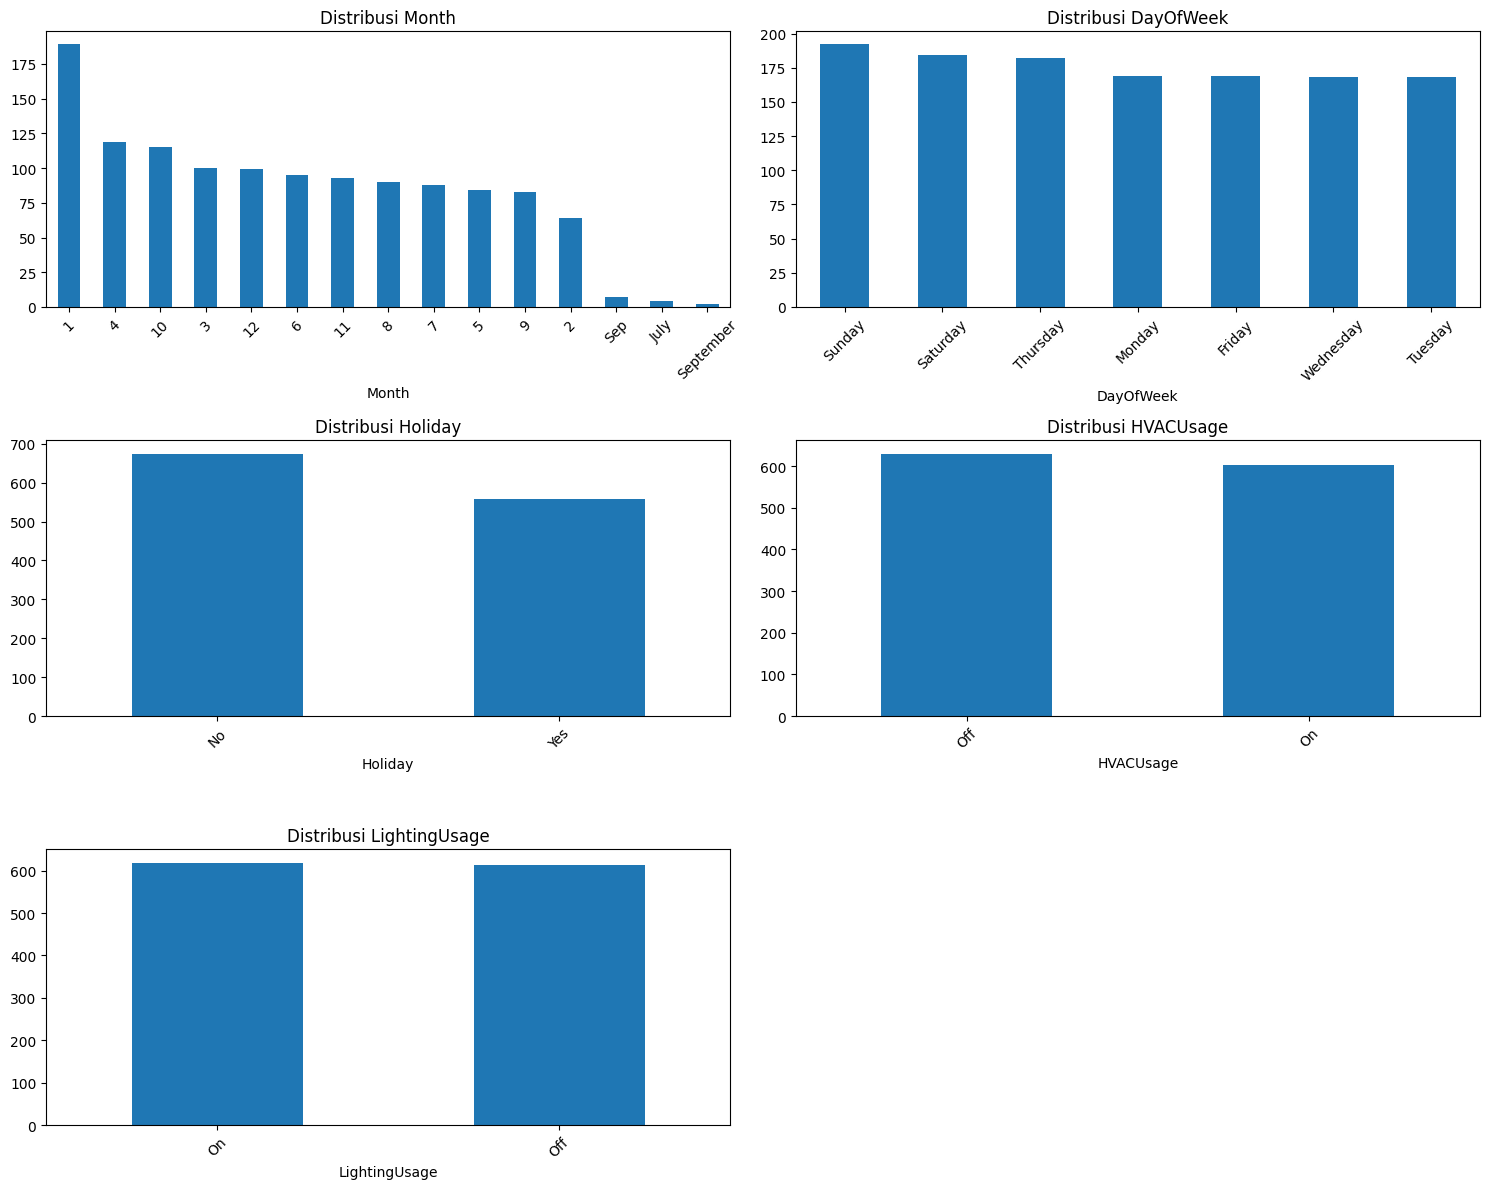

In [11]:
categorical_cols = ['Month', 'DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Analisis Cross - Tabulation

##### Hubungan HVAC usage dengan lighting usage

In [12]:
print("\nCross-tab HVACUsage vs LightingUsage:")
print(pd.crosstab(data['HVACUsage'], data['LightingUsage']))


Cross-tab HVACUsage vs LightingUsage:
LightingUsage  Off   On
HVACUsage              
Off            315  315
On             298  304


#### Analisis Variabel Numerik (Cek Outlier) 

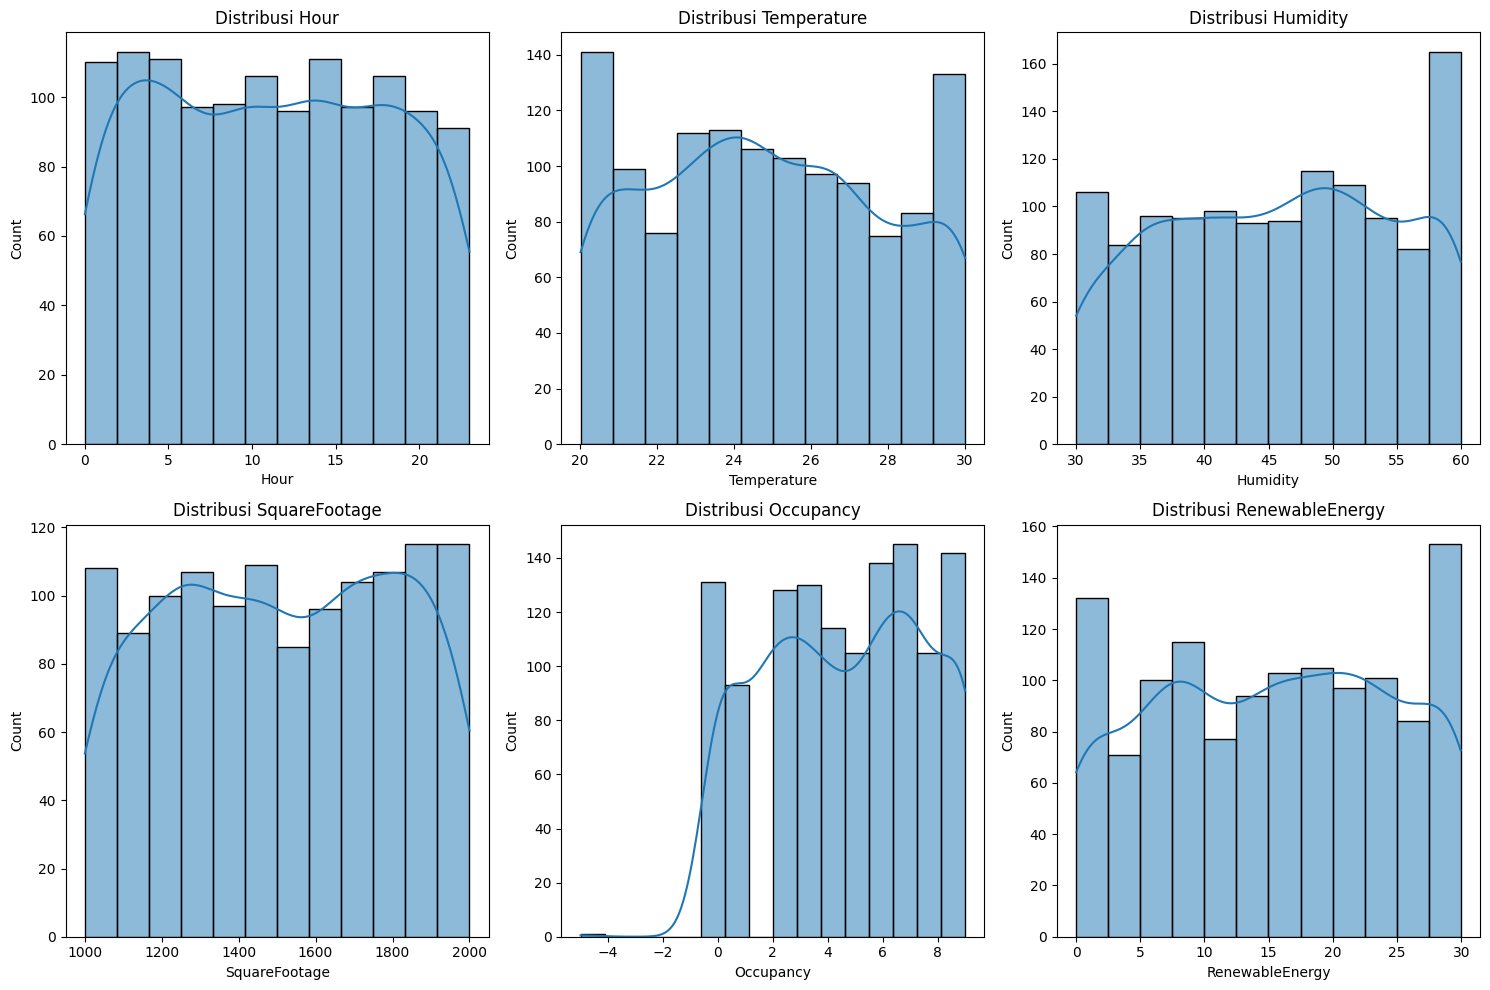

In [13]:
numeric_cols = ['Hour', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

#### Boxplot Variabel Numerik 

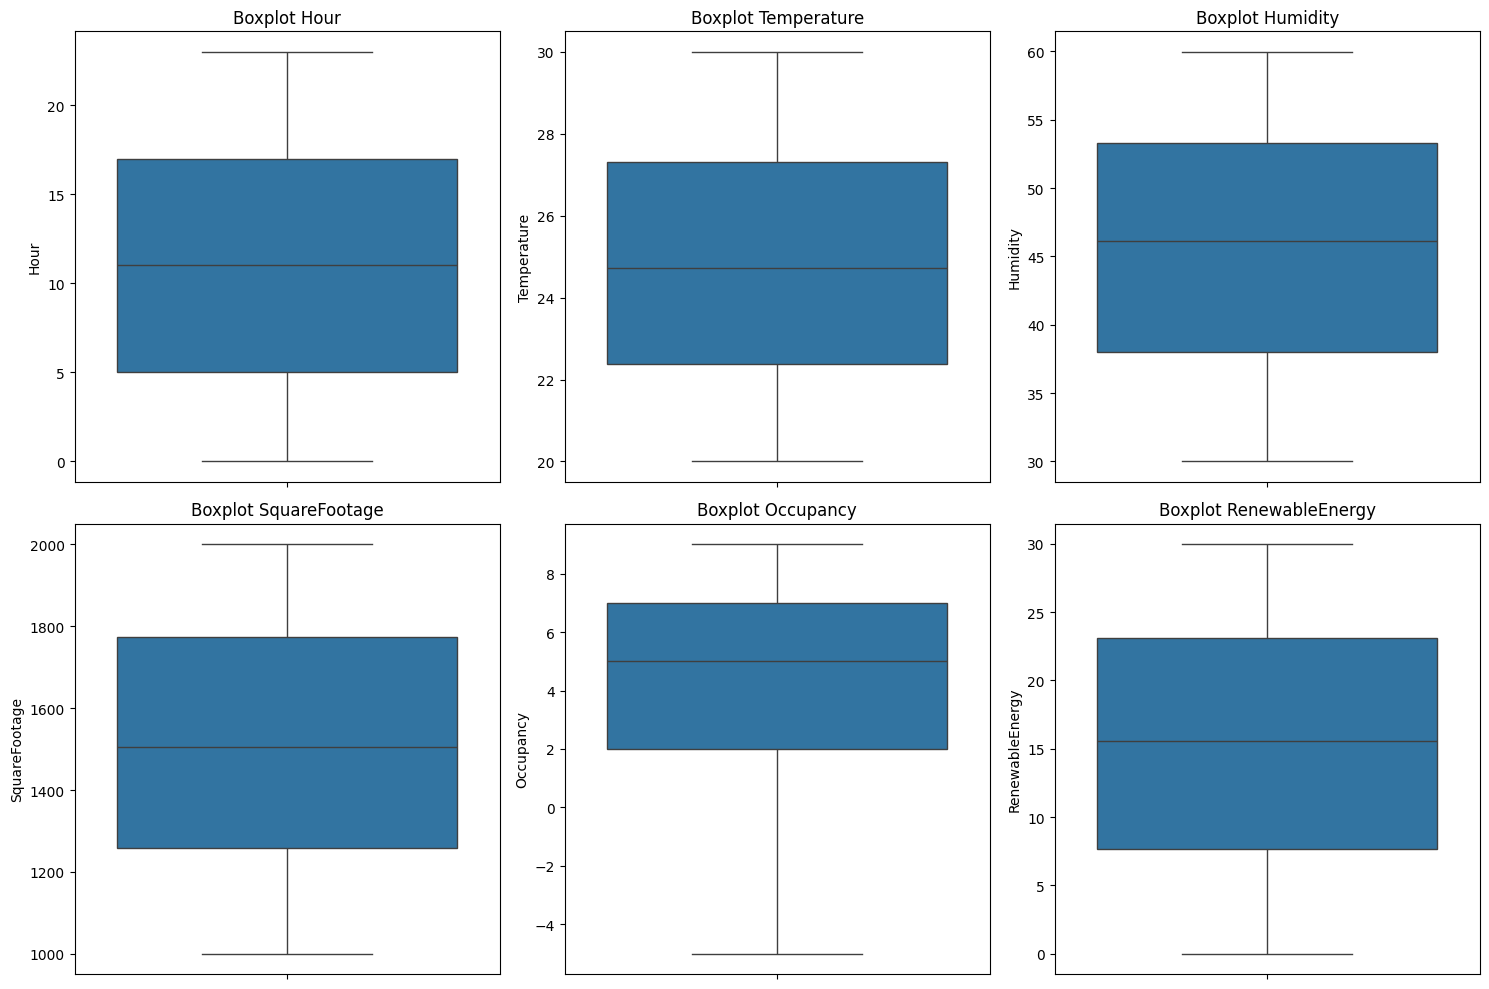

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Pada Variabel Occupany tedapat nilai negatif sebagai outlier. 
Untuk kolom numerik lainnya tidak ada outlier yang terdeteksi secara visual dalam boxplot-boxplot tersebut

#### Analisis Temporal

In [15]:
data['EnergyConsumption'] = pd.to_numeric(data['EnergyConsumption'], errors='coerce')

##### Pola Bulanan

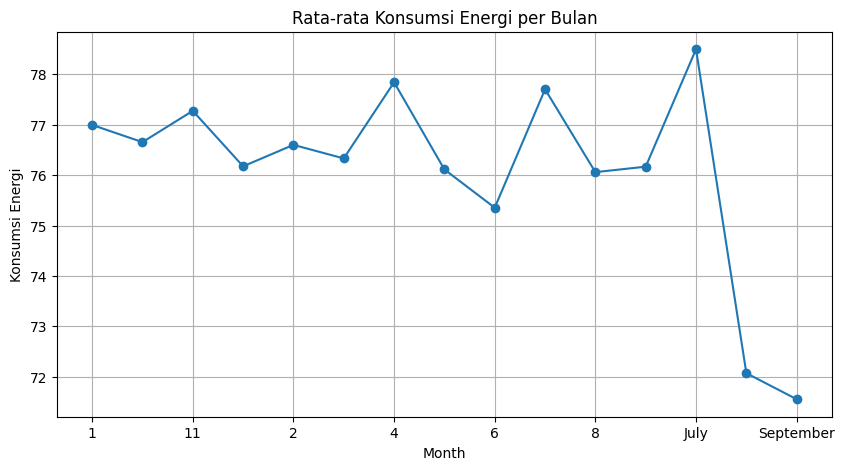

In [16]:
if 'EnergyConsumption' in data.columns and data['EnergyConsumption'].dtype in ['float64', 'int64']:
    monthly_energy = data.groupby('Month')['EnergyConsumption'].mean()
    plt.figure(figsize=(10, 5))
    monthly_energy.plot(kind='line', marker='o')
    plt.title('Rata-rata Konsumsi Energi per Bulan')
    plt.ylabel('Konsumsi Energi')
    plt.grid(True)
    plt.show()

Konsumsi stabil dari Januari hingga November.
Kenaikan dan penurunan drastis pada bulan Agustus ke July dan July ke September disebabkan oleh data yang inkonsisten

##### Pola Harian

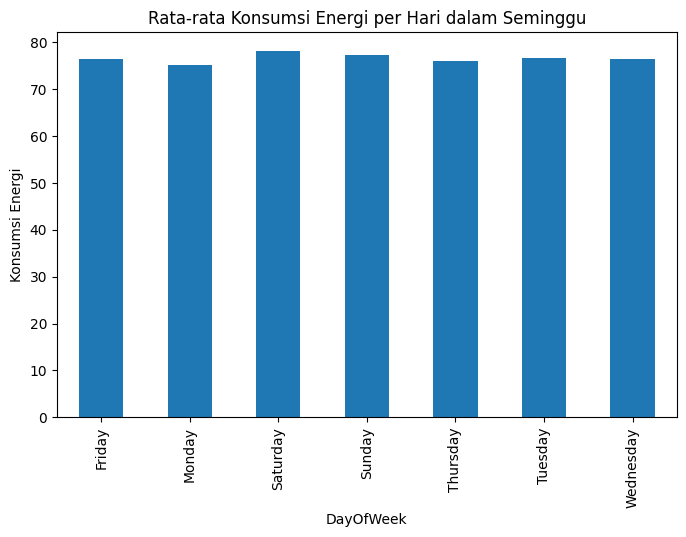

In [17]:
if 'EnergyConsumption' in data.columns and data['EnergyConsumption'].dtype in ['float64', 'int64']:
    daily_energy = data.groupby('DayOfWeek')['EnergyConsumption'].mean()
    plt.figure(figsize=(8, 5))
    daily_energy.plot(kind='bar')
    plt.title('Rata-rata Konsumsi Energi per Hari dalam Seminggu')
    plt.ylabel('Konsumsi Energi')
    plt.show()

Rata-rata konsumsi energi konsisten di semua hari.

##### Pola per Jam

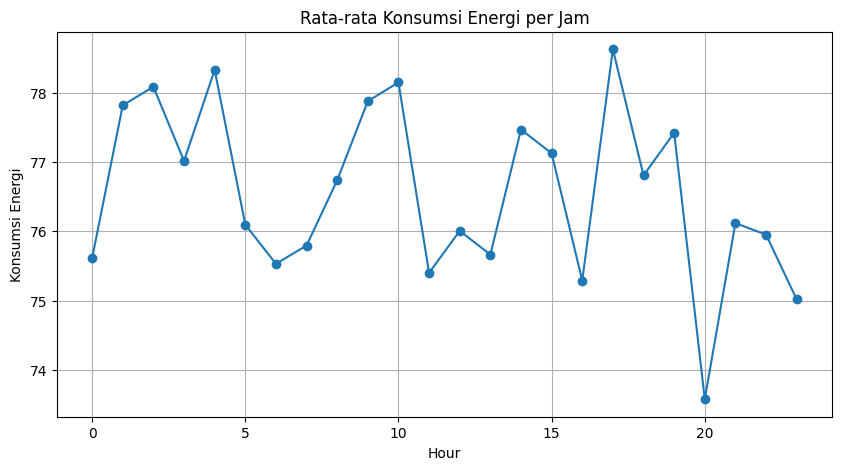

In [18]:
if 'EnergyConsumption' in data.columns and data['EnergyConsumption'].dtype in ['float64', 'int64']:
    hourly_energy = data.groupby('Hour')['EnergyConsumption'].mean()
    plt.figure(figsize=(10, 5))
    hourly_energy.plot(kind='line', marker='o')
    plt.title('Rata-rata Konsumsi Energi per Jam')
    plt.ylabel('Konsumsi Energi')
    plt.grid(True)
    plt.show()

Konsumsi cenderung tinggi antara jam 0 - 10 dan menurun drastis di malam hari.
Puncak konsumsi terjadi sekitar jam 17-18.

#### Analisis Multivariat

##### Hubungan Suhu dan Konsumsi Energi

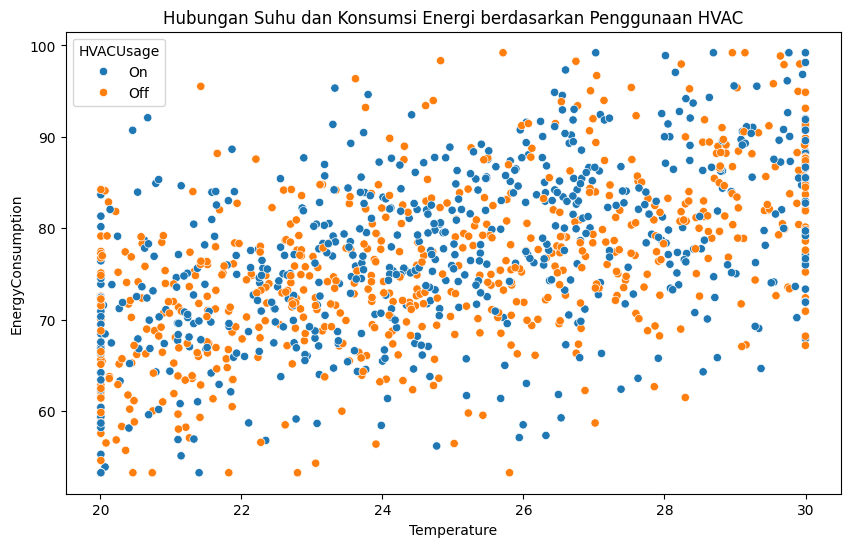

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='EnergyConsumption', data=data, hue='HVACUsage')
plt.title('Hubungan Suhu dan Konsumsi Energi berdasarkan Penggunaan HVAC')
plt.show()

##### Hubungan Okupansi dan Konsumsi Energi

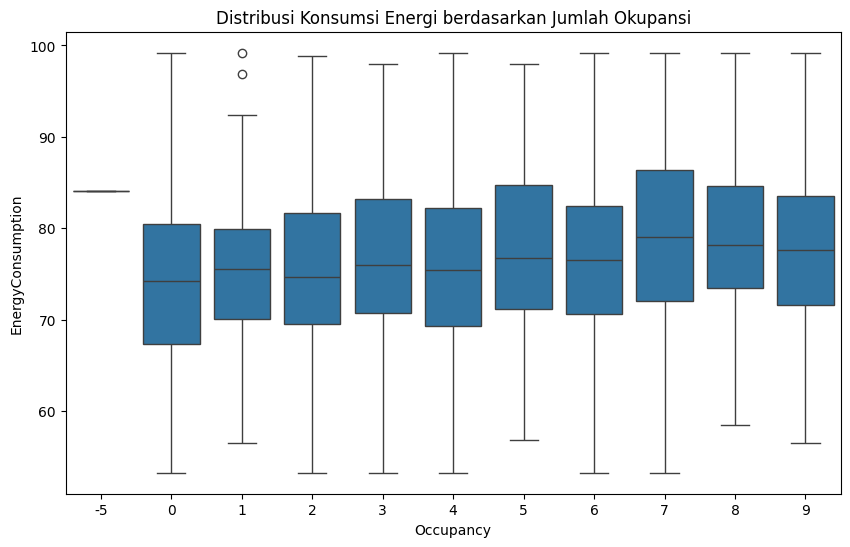

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupancy', y='EnergyConsumption', data=data)
plt.title('Distribusi Konsumsi Energi berdasarkan Jumlah Okupansi')
plt.show()

#### Heatmap Korelasi 

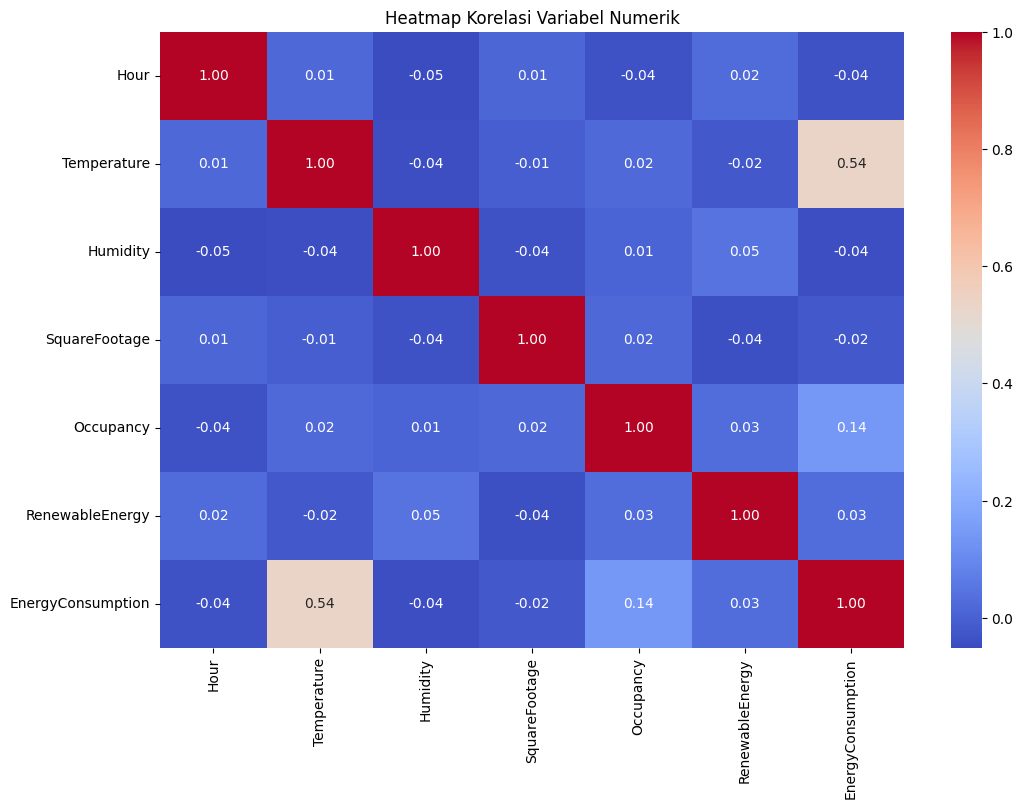

In [21]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

### Hasil EDA

Jumlah Baris: 1.232
Jumlah Kolom: 12
Target yang diprediksi: EnergyConsumption
Beberapa fitur kategorikal: Month, DayOfWeek, Holiday, HVACUsage, LightingUsage

Missing Value: Tidak Ada
Data Duplikat: Tidak Ada
Outlier : Tidak Ada

#### Bedasarkan hasil EDA, berikut masalah yang teridentifikasi:
##### 1. Inkonsistensi Data pada Kolom Month dan EnergyConsumption
- Seharusnya berisi angka bulan (1-12), tetapi ada nilai teks ("Sep", "July", "September"). 
- String nan pada energyConsumption yang seharusnya merupakan missing Value.

##### 2. Missing Values:
- Setelah nan diubah menjadi nilai EnergyConsumption memiliki 3 data kosong.

##### 3. Tipe Data:
- Tipe data EnergyConsumption yang object.

##### 4. Outlier / Anomali:
- Nilai Occupancy ada yang -5 (tidak mungkin negatif).
        

<span style="color: blue; font-size: 19px;">Data Preprocesing</span>

#### Berdasarkan hasil EDA, berikut adalah Data Preprocessing yang perlu dilakukan:


##### 1. Handle Value yang tidak konsisten.
  - Memastikan hanya angka 1-12 di kolom Month.
  - Mengubah string nan di kolom EnergyConsumption menjadi nilai.
    
    
##### 2. Tangani missing value (EnergyConsumption).
  - Menghilangkan missing value di kolom EnergyConsumption

##### 3. Konversi Tipe Data
  - Mengubah tipe data kolom EnergyConsumption dari object menjadi Float

##### 4. Scaling kolom numerik 
  - Menggunakan StandardScaler untuk kolom numerik.

##### 5. Encoding kolom Kategorikal 
  - Holiday, HVACUsage, LightingUsage jadi 0/1.
  - DayOfWeek bisa di-one-hot encoding.

##### 6. Pembagian Data: 
  - 70% train, 10% val, 20% test.

#### Handle Missing Value 

In [22]:
data['EnergyConsumption'] = data['EnergyConsumption'].astype(str).str.strip()
data['EnergyConsumption'] = data['EnergyConsumption'].replace(['nan', 'NaN', ' NAN', ' nan', 'nan '], np.nan)

In [23]:
data = data.dropna(subset=['EnergyConsumption'])

In [24]:
print(data['EnergyConsumption'].isna().sum())

0


In [25]:
data = data[data["Occupancy"] >= 0]

#### Konversi Tipe Data

In [26]:
data['EnergyConsumption'] = pd.to_numeric(data['EnergyConsumption'], errors='coerce')

In [27]:
print(data['EnergyConsumption'].dtype) 

float64


#### Handle Value yang Tidak Konsisten

In [28]:
data['Month'] = data['Month'].replace({'Sep': 9, 'July': 7, 'September': 9}).astype('int8')

In [29]:
print(data['Month'].value_counts())

Month
1     189
4     119
10    114
3      99
12     99
6      95
9      92
7      92
11     92
8      89
5      84
2      64
Name: count, dtype: int64


#### Scalling Kolom Numerik

In [30]:
numeric_cols = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

#### Encoding Kolom Kategorikal

##### Label Encoding

In [31]:
label_cols = ["Month", "Holiday", "HVACUsage", "LightingUsage"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

##### One Hot Encoding

In [32]:
dayofweek_encoded = pd.get_dummies(data["DayOfWeek"], prefix="Day")
data = pd.concat([data.drop("DayOfWeek", axis=1), dayofweek_encoded], axis=1)


In [33]:
data.head()

,Month,Hour,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,7,3,1,-0.130599,1.568776,-0.362076,0.823572,1,0,1.588264,82.057358,False,False,False,True,False,False,False
1,0,8,0,0.466571,0.624989,-0.977292,1.169332,1,0,-1.012613,83.889177,False,False,False,False,False,False,True
2,0,19,1,-1.435109,-0.531564,-1.334892,1.169332,0,1,0.560403,66.202098,False,False,False,True,False,False,False
3,6,3,1,-1.315928,0.123407,-1.395513,0.823572,0,1,0.650655,66.439179,False,False,False,False,False,False,True
4,9,17,0,-0.615162,0.359224,1.644362,-1.250985,0,0,-1.231804,76.902272,False,False,True,False,False,False,False


#### Data Training and Testing

In [34]:
X = data.drop('EnergyConsumption', axis=1)
y = data['EnergyConsumption']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

##### Output Shape

In [35]:
X_train.shape, X_val.shape, X_test.shape

((859, 17), (123, 17), (246, 17))

##### Split Data

In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.666, random_state=42) 

In [37]:
print(f"Train: {X_train.shape[0]} sampel ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation: {X_val.shape[0]} sampel ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test: {X_test.shape[0]} sampel ({len(X_test)/len(X)*100:.1f}%)")

Train: 859 sampel (70.0%)
Validation: 123 sampel (10.0%)
Test: 246 sampel (20.0%)


#### Normalisasi Data

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

<span style="color: red; font-size: 19px;"> B. Baseline Model</span>

In [39]:
input_dim = X_train.shape[1]  
min_neurons = input_dim * 2  

<span style="color: blue; font-size: 18px;">Sequential Model</span>

In [40]:
sequential_model = models.Sequential([
    layers.Dense(min_neurons, activation='relu', input_shape=(input_dim,)),  
    layers.Dense(min_neurons, activation='relu'),  
    layers.Dense(1) 
])

sequential_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\nArsitektur Sequential Model:")
sequential_model.summary()


Arsitektur Sequential Model:


C:\Users\user\anaconda3\envs\tf39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 34)                  │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 34)                  │           1,190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,837 (7.18 KB)

 Trainable params: 1,837 (7.18 KB)

 Non-trainable params: 0 (0.00 B)

#### Sequentional Model Training

In [41]:
sequential_history = sequential_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5822.2954 - mae: 75.7066 - val_loss: 5708.9976 - val_mae: 74.9902
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5630.4756 - mae: 74.4755 - val_loss: 5364.4951 - val_mae: 72.6558
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5126.6841 - mae: 70.9738 - val_loss: 4764.5205 - val_mae: 68.3910
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4545.7603 - mae: 66.7003 - val_loss: 3863.4536 - val_mae: 61.4084
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3551.0237 - mae: 58.7340 - val_loss: 2741.3396 - val_mae: 51.3503
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2380.8352 - mae: 47.5235 - val_loss: 1607.2340 - val_mae: 38.4644
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1265.0066 - mae: 33.5935 - val_loss: 755.0526 - val_mae: 24.6805
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 554.2360 - mae: 20.7763 - val_loss: 324.0500 - val_mae: 14.5649
Epoch 9/10


<span style="color: blue; font-size: 18px;">Functional Model</span>

In [42]:
inputs = layers.Input(shape=(input_dim,))

x = layers.Dense(min_neurons, activation='relu')(inputs)  
x = layers.Dense(min_neurons, activation='relu')(x)      

outputs = layers.Dense(1)(x)  

functional_model = models.Model(inputs=inputs, outputs=outputs)

functional_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

print("\nArsitektur Functional Model:")
functional_model.summary()



Arsitektur Functional Model:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 34)                  │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 34)                  │           1,190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,837 (7.18 KB)

 Trainable params: 1,837 (7.18 KB)

 Non-trainable params: 0 (0.00 B)

#### Training Functional Model

In [43]:
functional_history = functional_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5859.6953 - mae: 75.9719 - val_loss: 5649.3037 - val_mae: 74.5896
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5530.3770 - mae: 73.7979 - val_loss: 5284.6323 - val_mae: 72.0909
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5109.1841 - mae: 70.8214 - val_loss: 4693.0317 - val_mae: 67.8361
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4435.1284 - mae: 65.8553 - val_loss: 3856.9224 - val_mae: 61.3008
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3581.3967 - mae: 58.8907 - val_loss: 2837.7561 - val_mae: 52.1849
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2490.6165 - mae: 48.5328 - val_loss: 1796.4020 - val_mae: 40.7278
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1496.5592 - mae: 36.4095 - val_loss: 926.0297 - val_mae: 27.8981
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 728.0967 - mae: 23.7340 - val_loss: 409.3969 - val_mae: 16.8021
Epoch 9/10


<span style="color: red; font-size: 19px;"> C. Modification</span>

In [44]:
import shutil
shutil.rmtree('tuning/sequential_v3', ignore_errors=True)

<span style="color: blue; font-size: 18px;">Sequential Model Improved</span>

In [45]:
def build_sequential_model(hp):
    model = Sequential()
    
    hp_units1 = hp.Int('units1', min_value=128, max_value=512, step=64)
    hp_units2 = hp.Int('units2', min_value=64, max_value=256, step=32)
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    hp_l2 = hp.Choice('l2_reg', values=[1e-2, 1e-3, 1e-4])
    hp_learning_rate = hp.Choice('lr', values=[1e-3, 5e-4, 1e-4])
    hp_activation = hp.Choice('activation', ['swish', 'gelu', 'relu'])
    
    model.add(Dense(
        units=hp_units1,
        activation=hp_activation,
        kernel_regularizer=regularizers.l2(hp_l2),
        input_shape=(X_train_scaled.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp_dropout))
    
    model.add(Dense(
        units=hp_units2,
        activation='swish',
        kernel_regularizer=regularizers.l2(hp_l2/2))
    )
    model.add(Dropout(hp_dropout*0.8))
    
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

sequential_tuner = kt.Hyperband(
    build_sequential_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='tuning',
    project_name='sequential_v3'
)

sequential_tuner.search(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

best_sequential = sequential_tuner.get_best_models(num_models=1)[0]

best_sequential.summary()

Trial 90 Complete [00h 00m 17s]
val_loss: 72.88360595703125

Best val_loss So Far: 59.330379486083984
Total elapsed time: 00h 06m 05s


C:\Users\user\anaconda3\envs\tf39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\user\anaconda3\envs\tf39\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 384)                 │           6,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 384)                 │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 96)                  │          36,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,505 (177.75 KB)

 Trainable params: 44,737 (174.75 KB)

 Non-trainable params: 768 (3.00 KB)

#### Training Sequential Model Improved

In [47]:
callbacks = [
    EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

seq_history = best_sequential.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166.3595 - mae: 10.3986

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 168.0117 - mae: 10.4389 - val_loss: 70.4725 - val_mae: 6.6337 - learning_rate: 0.0010
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 161.6901 - mae: 10.0947

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 161.6269 - mae: 10.0981 - val_loss: 66.5264 - val_mae: 6.4031 - learning_rate: 0.0010
Epoch 3/200
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166.8730 - mae: 10.5534 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 166.0891 - mae: 10.5212 - val_loss: 64.8946 - val_mae: 6.1950 - learning_rate: 0.0010
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 157.3959 - mae: 10.0698 - val_loss: 76.1516 - val_mae: 6.8105 - learning_rate: 0.0010
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 168.5132 - mae: 10.4277 - val_loss: 67.5357 - val_mae: 6.4790 - learning_rate: 0.0010
Epoch 6/200
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 143.3767 - mae: 9.7298 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 144.6821 - mae: 9.7600 - val_loss: 61.9536 - val_mae: 6.1017 - learning_rate: 0.0010
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 155.0075 - mae: 9.8038 - val_loss: 63.8120 - val_mae: 6.5128 - learning_rate: 0.0010
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 144.7402 - mae: 9.3951 - val_loss: 74.6140 - val_mae: 6.6879 - learning_rate: 0.0010
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 166.7565 - mae: 10.2477 - val_loss: 65.8060 - val_mae: 6.3689 - learning_rate: 0.0010
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 162.7485 - mae: 10.1582 - val_loss: 67.5598 - val_mae: 6.5234 - learning_rate: 0.0010
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 150.7495 - mae: 9.7856 - val_loss: 66.5417 - val_mae: 6.5350 - learning_rate: 0.0010
Epoch 12/200
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 148.7515 - mae: 9.7017 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 148.9933 - mae: 9.7118 - val_loss: 61.9058 - val_mae: 6.2736 - learning_rate: 5.0000e-04
Epoch 13/200
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 152.9187 - mae: 9.7312 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 152.5643 - mae: 9.7335 - val_loss: 58.9793 - val_mae: 6.0971 - learning_rate: 5.0000e-04
Epoch 14/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 150.8976 - mae: 9.9192 - val_loss: 60.0592 - val_mae: 6.0797 - learning_rate: 5.0000e-04
Epoch 15/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 155.6620 - mae: 9.8934 - val_loss: 62.7461 - val_mae: 6.1853 - learning_rate: 5.0000e-04
Epoch 16/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 135.5926 - mae: 9.4619 - val_loss: 61.5678 - val_mae: 6.2107 - learning_rate: 5.0000e-04
Epoch 17/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 141.0490 - mae: 9.4351 - val_loss: 61.8050 - val_mae: 6.1489 - learning_rate: 5.0000e-04
Epoch 18/200
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156.7806 - mae: 9.9112  

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 157.1105 - mae: 9.9026 - val_loss: 58.8565 - val_mae: 5.9803 - learning_rate: 5.0000e-04
Epoch 19/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 154.8132 - mae: 9.8905 - val_loss: 61.8581 - val_mae: 6.1970 - learning_rate: 5.0000e-04
Epoch 20/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 151.8864 - mae: 9.7195 - val_loss: 66.9812 - val_mae: 6.5568 - learning_rate: 5.0000e-04
Epoch 21/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 141.2540 - mae: 9.5072 - val_loss: 67.1849 - val_mae: 6.4736 - learning_rate: 5.0000e-04
Epoch 22/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 158.5450 - mae: 9.9859 - val_loss: 60.5613 - val_mae: 6.0945 - learning_rate: 5.0000e-04
Epoch 23/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 156.4145 - mae: 10.1538 - val_loss: 58.9918 - val_mae: 6.0706 - learning_rate: 5.0000e-04
Epoch 24/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 142.0065 - mae: 9.5699 - val_loss: 59.0596 - val_ma

<span style="color: blue; font-size: 18px;">Functional Model Improved</span>

In [48]:
shutil.rmtree('tuning/sequential_v3', ignore_errors=True)

In [49]:
def build_functional_model(hp):
    hp_units1 = hp.Int('units1', min_value=256, max_value=1024, step=128)
    hp_units2 = hp.Int('units2', min_value=128, max_value=512, step=64)
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.6, step=0.1)
    hp_lr = hp.Choice('lr', values=[5e-4, 1e-3, 5e-3])
    hp_weight_decay = hp.Choice('wd', values=[1e-4, 1e-3])
    
    inputs = Input(shape=(X_train_scaled.shape[1],))

    x1 = Dense(
        hp_units1,
        activation='gelu',
        kernel_regularizer=regularizers.l2(hp_weight_decay)
    )(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(hp_dropout)(x1)

    x2 = Dense(
        hp_units2,
        activation='gelu'
    )(x1)
    x2 = BatchNormalization()(x2)
    
    residual = Dense(hp_units2)(inputs)
    x2 = Add()([x2, residual])
    x2 = Dropout(hp_dropout*0.7)(x2)
    
    outputs = Dense(1, activation='linear')(x2)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(
        optimizer=AdamW(learning_rate=hp_lr, weight_decay=hp_weight_decay),
        loss=Huber(delta=1.5),
        metrics=['mae']
    )
    
    return model

functional_tuner = kt.BayesianOptimization(
    build_functional_model,
    objective='val_loss',
    max_trials=30,
    directory='tuning',
    project_name='functional_v3'
)

functional_tuner.search(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=150,
    callbacks=[
        EarlyStopping(patience=15, restore_best_weights=True)
    ]
)

best_functional = functional_tuner.get_best_models(num_models=1)[0]

best_functional.summary()

Reloading Tuner from tuning\functional_v3\tuner0.json


C:\Users\user\anaconda3\envs\tf39\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 17)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 512)               │           9,216 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 512)               │           2,048 │ dense[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 512)               │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 384)               │         196,992 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 384)               │           1,536 │ dense_1[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 384)               │           6,912 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 384)               │               0 │ batch_normalization_1[0][… │
│                               │                           │                 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 384)               │               0 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 1)                 │             385 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 217,089 (848.00 KB)

 Trainable params: 215,297 (841.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

#### Training Functional Model Improved

In [50]:
func_history = best_functional.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=300,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/300
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.3437 - mae: 6.9111

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 9.4702 - mae: 6.9960 - val_loss: 9.1233 - val_mae: 6.7810 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6079 - mae: 7.0906

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.5597 - mae: 7.0583 - val_loss: 8.1724 - val_mae: 6.1285 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.9168 - mae: 6.6296 - val_loss: 8.2837 - val_mae: 6.2092 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.9565 - mae: 6.6612 - val_loss: 8.3775 - val_mae: 6.2747 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.4338 - mae: 6.3099 - val_loss: 8.4397 - val_mae: 6.3060 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.7445 - mae: 6.5184 - val_loss: 8.5242 - val_mae: 6.3748 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.5467 - mae: 6.3737 - val_loss: 8.4579 - val_mae: 6.3299 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.5942 - mae: 6.4178 - val_loss: 8.3952 - val_mae: 6.2990 - learning_rate: 5.0000e-04
Epoch 9/300
7/7 ━━━━━━━━━━━━

<span style="color: red; font-size: 19px;"> D. Evaluasi</span>

In [51]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    return mae, mse, r2

models_list = {
    "Sequential Model": sequential_model,
    "Functional Model": functional_model,
    "Sequential Model V2": best_sequential,
    "Functional Model V2": best_functional
}

results = {}
for name, model in models_list.items():
    mae, mse, r2 = evaluate_model(model, X_val_scaled, y_val)
    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R²: {metrics['R²']:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022A1E1E69D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Sequential Model:
MAE: 10.1390
MSE: 151.1790
R²: -0.7687

Functional Model:
MAE: 9.5474
MSE: 140.3417
R²: -0.6419

Sequential Model V2:
MAE: 5.9803
MSE: 58.6717
R²: 0.3136

Functional Model V2:
MAE: 6.1285
MSE: 60.3633
R²: 0.2938


In [52]:
pd.DataFrame(results).T

,MAE,MSE,R²
Sequential Model,10.138952,151.178973,-0.768737
Functional Model,9.547431,140.341678,-0.641945
Sequential Model V2,5.980305,58.671659,0.313564
Functional Model V2,6.128483,60.363344,0.293772


##### Analisis

Sequential Model vs Functional Model:

    Kedua model versi awal (Sequential dan Functional) belum mampu memodelkan relasi dengan baik, terbukti dari skor R² yang negatif, MSE dan MAE yang tinggi juga menunjukkan prediksi yang cukup jauh dari nilai aktual.
    
Sequential Model V2 dan Functional Model V2:
     
     - Sequential Model V2 unggul tipis dari Functional V2 dalam ketiga metrik. MAE dan MSE lebih kecil, serta R² lebih besar.

    - Kedua versi V2 menunjukkan peningkatan performa signifikan. Ini terlihat dari penurunan MAE & MSE, serta R² yang positif (meski belum tinggi).

    

#### Plot 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


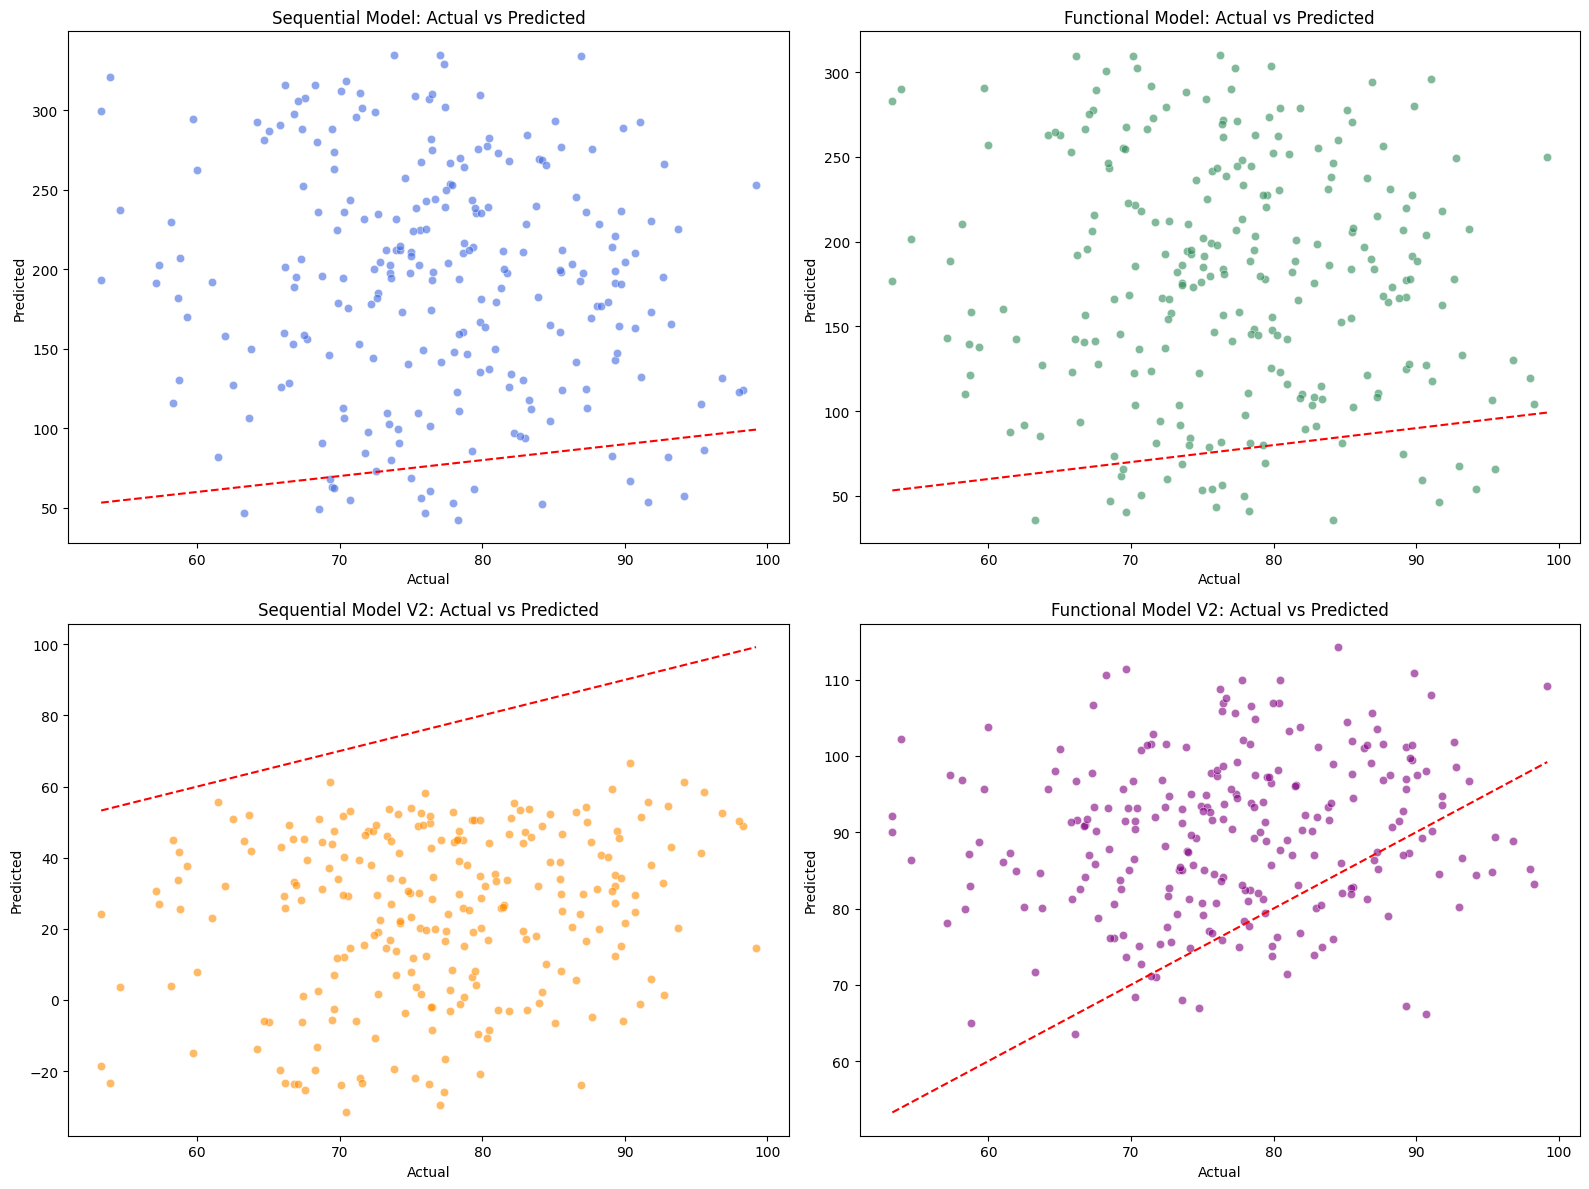

In [53]:
y_pred_seq = sequential_model.predict(X_test).flatten()
y_pred_func = functional_model.predict(X_test).flatten()
y_pred_seq_v2 = best_sequential.predict(X_test).flatten()
y_pred_func_v2 = best_functional.predict(X_test).flatten()

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_seq, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sequential Model: Actual vs Predicted")

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_func, color='seagreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Functional Model: Actual vs Predicted")


plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_seq_v2, color='darkorange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sequential Model V2: Actual vs Predicted")


plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_func_v2, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Functional Model V2: Actual vs Predicted")

plt.tight_layout()
plt.show()

##### Analisis
1. Sequential Model: Sebaran titik prediksi sangat acak dan jauh dari garis merah (ideal), memperkuat hasil R² negatif.
2. Functional Model: Mirip dengan Sequential, namun sedikit lebih baik distribusinya.
3. Sequential Model V2: Titik-titik mulai berkerumun di sekitar garis merah, menunjukkan prediksi yang lebih baik.
4. Functional Model V2: Distribusi prediksi paling stabil dan mendekati garis ideal, walaupun secara metrik sedikit di bawah Sequential V2


#### Perbandingan Plot 

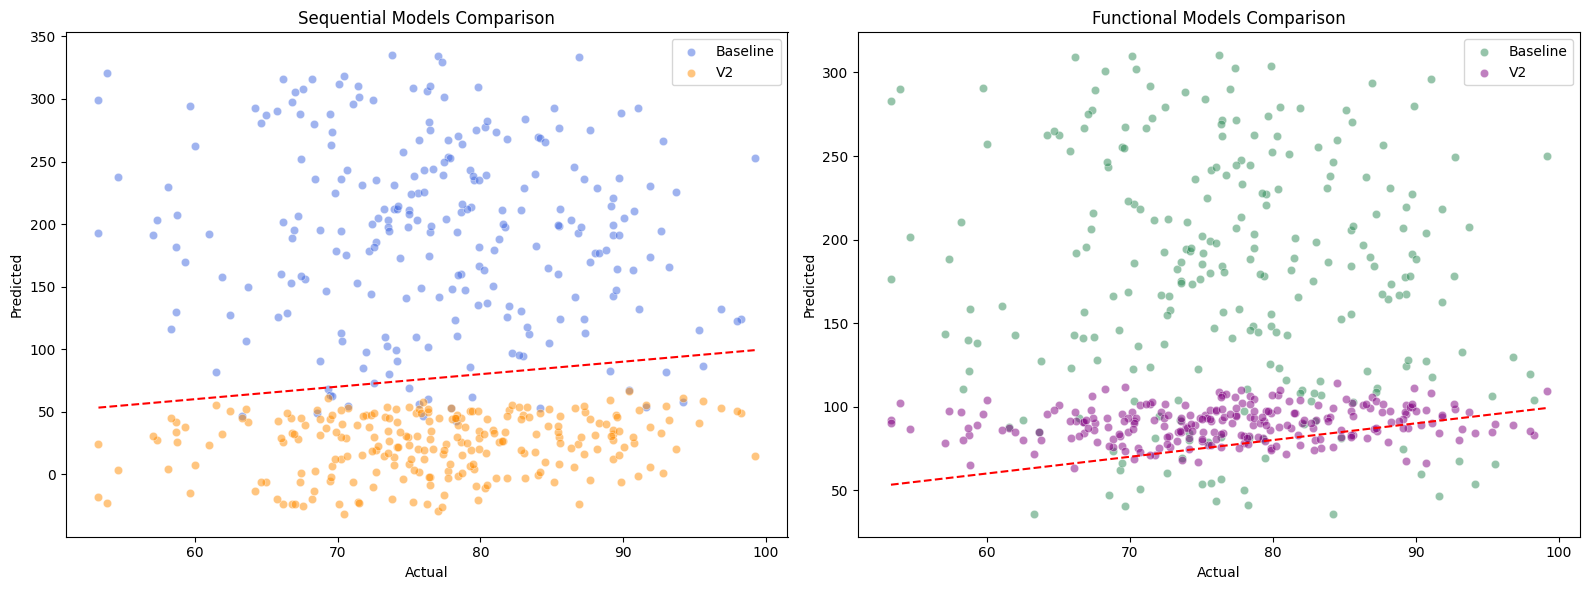

In [54]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_seq, color='royalblue', alpha=0.5, label='Baseline')
sns.scatterplot(x=y_test, y=y_pred_seq_v2, color='darkorange', alpha=0.5, label='V2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sequential Models Comparison")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_func, color='seagreen', alpha=0.5, label='Baseline')
sns.scatterplot(x=y_test, y=y_pred_func_v2, color='purple', alpha=0.5, label='V2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Functional Models Comparison")
plt.legend()

plt.tight_layout()
plt.show()

##### Analisis 
1. Sequential Model (kiri):
    - Titik biru mewakili model awal. Sebagian besar prediksinya tersebar sangat jauh dari garis merah (ideal).
    - Titik oranye berasal dari Sequential V2. Sebarannya lebih mendekati garis ideal dan lebih terkonsentrasi, menunjukkan perbaikan yang signifikan.
    - Terlihat bahwa model awal cenderung menghasilkan prediksi yang terlalu tinggi dan menyimpang dari nilai aktual.

2. Functional Model (kanan):
    - Titik hijau adalah prediksi dari model awal, yang juga menunjukkan penyebaran yang sangat acak dan jauh dari garis ideal.
    - Sedangkan titik ungu dari Functional V2 menunjukkan distribusi yang lebih sempit dan stabil di sekitar garis merah.
    - Bahkan secara visual, model V2 ini sudah jauh lebih mendekati garis ideal yang menunjukkan bahwa model berhasil mengenali pola data lebih baik.


### Kesimpulan

Performa model meningkat signifikan pada versi modifikasi, yang kemungkinan besar disebabkan oleh:

    - Perbaikan arsitektur (residual connection, normalization, activation).

    - Hyperparameter tuning yang lebih optimal.

Sequential Model V2 menjadi model terbaik secara metrik kuantitatif, namun Functional Model V2 punya sebaran prediksi yang lebih konsisten dan stabil secara visual.


<span style="color: red; font-size: 19px;"> E. Presentation Video</span>

Video Link: https://drive.google.com/file/d/1H6aMoiVc8Sqd8kRF_UCueMvdH8g0eIsZ/view?usp=sharing 